
<img src="./images/Bangalore.png">

# <center> The Battle of Neighbourhood : Bangalore : The Silicon Valley of India </center>

### <center> A Geo-Spatial Analysis for Fine Dinning Across The City with Varying Pricing Options </center>

A city and its people living the different pockets of a city usually decides the locality and standard of life. But there is no way ywe can measure this easily but knowingly based in real-estate pricing and rentals. However, the daily usage things like food options and their pricing are directly correlated to the people ready to offer similar food across different part of city. Of course cusine and grourmet does decide the premium of prices. In this exercise I want to study using food options for a couple/pair/2 people on average based on locality based pricing from food aggregators. Zomato is a prominent food ordering aggregator. We will use foursquare to know the locality geographically. Combine both the data to see if there are distintive places emerging for standard of living or better say affordability index.

## Table of Contents

* [Introduction](#introduction)
* [Data Collection from APIs](#data_collection)
* [Data Cleaning](#data_cleaning)
* [Methodolgy](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# 1. INTRODUCTION  <a name="introduction"></a>


The aim of the project is to identify venues in Chandigarh, India based on their rating and average prices. In this notebook, we will identify various venues in the city of **Bangalore, India**, using **Foursquare API** and **Zomato API**, to help visitors select the restaurants that suit them the best.

Whenever a user is visiting a city they start looking for places to visit during their stay. They primarily look for places based on the venue ratings across all venues and the average prices such that the locations fits in their budget.

Here, we'll **identify places that are fit for various individuals** based on the information collected from the two APIs and Data Science. Once we have the plot with the venues, any company can launch an application using the same data and suggest users such information.

## Bangalore: The Silicon Valley of India



**About BANGALORE/BENGALURU :** Bangalore, officially known as Bengaluru, is the capital of the Indian state of Karnataka. It has a population of over ten million, making it a megacity and the third-most populous city and fifth-most populous urban agglomeration in India. It is located in southern India, on the Deccan Plateau at an elevation of over 900 m (3,000 ft) above sea level, which is the highest among India's major cities. Bangalore is a cosmopolitan spreading in an area of 741 km² of the metropolitan region, with many suburbs as IT hub and special economic zones. : *source:* **Wikipedia**


We can will use 'geopy' and 'geocoder' library to extract the latitude and longitude values of Bangalore City, also known as Bengaluru.

In [8]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'ITPL, Bangalore, India', # 'Whitefield, Bangalore, India' 
geolocator = Nominatim(user_agent="application") #geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates Bangalore City are {}, {}.'.format(latitude, longitude))

The geograpical coordinates Bangalore City are 12.9845687, 77.73766428361034.


In [9]:
BLR_LAT = location.latitude
BLR_LON = location.longitude
print('The geograpical coordinates of Bangalore are {}, {}.'.format(BLR_LAT, BLR_LON))

The geograpical coordinates of Bangalore are 12.9845687, 77.73766428361034.


Let's use the `folium` library to create a **complete map zoomed on Bangalore**. We'll also plot a marker on the coordinates we just identified above. This would give us a relatively good look at the center point we will be considering. 

## Visualizing the Neigbourhood

In [10]:
#!pip install folium
import folium

bangalore_map = folium.Map(location = [BLR_LAT, BLR_LON], zoom_start = 12)
folium.Marker([BLR_LAT, BLR_LON]).add_to(bangalore_map)
bangalore_map.save("maps/bangalore_map.html")
bangalore_map

FileNotFoundError: [Errno 2] No such file or directory: 'maps/bangalore_map.html'

### 2.1. Cartesian Coordinate Systems and (X,Y = Longitude, Latitude)

First, let’s review the Cartesian coordinate system.  The X axis is the horizontal plane and the Y axis is the vertical plane. Two dimensional.  Pretty simple.

Now, let’s look at latitude and longitude. Latitude measures angular distance from the equator to a point north or south of the equator. While longitude is an angular measure of east/west from the Prime Meridian.

Now this is the important part.

Latitude values increase or decrease along the vertical axis, the Y axis.
Longitude changes value along the horizontal access, the X axis.

Long = X, Lat = Y 

In [11]:
#!pip3 install shapely
import shapely.geometry

#!pip install pyproj
import pyproj

import math

def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

bangalore_center=[latitude, longitude] 

print('Coordinate transformation check')
print('-------------------------------')
print('Bangalore City Center latitude={}, longitude={}'.format(bangalore_center[0], bangalore_center[1]))
x, y = lonlat_to_xy(bangalore_center[1], bangalore_center[0])
print('Bangalore center UTM X={}, Y={}'.format(x, y))
lo, la = xy_to_lonlat(x, y)
print('Bangalore center longitude={}, latitude={}'.format(lo, la))

Coordinate transformation check
-------------------------------
Bangalore City Center latitude=12.9845687, longitude=77.73766428361034
Bangalore center UTM X=8916037.988867695, Y=2981590.582716157
Bangalore center longitude=77.73766428355508, latitude=12.984568700000581


In [7]:
# City center in Cartesian coordinates
bangalore_center_x, bangalore_center_y = lonlat_to_xy(bangalore_center[1], bangalore_center[0]) 

k = math.sqrt(3) / 2 # Vertical offset for hexagonal grid cells
x_min = bangalore_center_x - 6000
x_step = 600
y_min = bangalore_center_y - 6000 - (int(21/k)*k*600 - 12000)/2
y_step = 600 * k 

latitudes = []
longitudes = []
distances_from_center = []
xs = []
ys = []
for i in range(0, int(21/k)):
    y = y_min + i * y_step
    x_offset = 300 if i%2==0 else 0
    for j in range(0, 21):
        x = x_min + j * x_step + x_offset
        distance_from_center = calc_xy_distance(whitefield_center_x, whitefield_center_y, x, y)
        if (distance_from_center <= 6001):
            lon, lat = xy_to_lonlat(x, y)
            latitudes.append(lat)
            longitudes.append(lon)
            distances_from_center.append(distance_from_center)
            xs.append(x)
            ys.append(y)

print(len(latitudes), 'candidate neighborhood centers generated.')

NameError: name 'whitefield_center_x' is not defined

# 2. DATA COLLECTION USING APIs <a name="data-collection"></a>

### Foursquare API

We begin by fetching a total of all venues in **Bangalore** upto a range of 10 Kilometers using the Foursquare API. The Foursquare API has the `explore` API which allows us to find venue recommendations within a given radius from the given coordinates. We will use this API to find all the venues we need.

In [21]:
FOURSQUARE_CLIENT_ID = 'LFIRHYYRWVUK0EKGTNPY1UMIUGP4JILOTFYJADO1U1KVH425'
FOURSQUARE_CLIENT_SECRET = 'X5RDIJSLRPFFPIQKBNDBAVI1JYHU51BQFXS1FOO5HI3N52E2'
RADIUS = 10000 # 10 Km
NO_OF_VENUES = 100
VERSION = '20200220' # Current date

We define the `get_category_type` method to get the correct category for each venue.

In [22]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

We'll call the API over and over till we get all venues from the API within the given distance. The maximum venues this API can fetch is 100, so we will fetch all venues by iteratively calling this API and increasing the offset each time.

* Foursquare API requires client_id, and client_secret to function which can be accessed after creating a developer account. 
* We will set the radius as 4 Kilometers. 
* The version is a required parameter which defines the date on which we are browsing so that it retrieves the latest data.

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        BLR_LAT, 
                                                                        BLR_LON, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))

Total 100 venues fetched within a total radius of 10.0 Km


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total 100 venues fetched within a total radius of 10.0 Km
Total 39 venues fetched within a total radius of 10.0 Km

Total 239 venues fetched


### Zomato API

The Zomato API allows using its search API to search for any given venue based on certain search filters such as query, latitude, longitude and more. Zomato also requires a Zomato user key which can be accessed with a developer account.

We'll use the `name`, `lat`, and `lng` values of various venues fetched from Foursquare API to use the search API and get more information regarding each venue.

* The query will be the name of the venue.
* The start defines from what offset we want to start, so we'll keep it at 0.
* The count defines the number of restaurants we want to fetch. As we have the exact location coordinates, we'll fetch only one.
* We will supply the latitude and longitude values.
* We will set the sorting criteria as `real_distance` so each time we get the venue we're searching based on location coordinates.

In [58]:
headers = {'user-key': 'b3a1c26ed20422bfaae7ada558744e1f'}
#headers = {'user-key': '652b6697b6e131455e3d67d8e374417b'}
venues_information = []

for index, row in foursquare_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1));
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
    
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])

Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20
Fetching data for venue: 21
Fetching data for venue: 22
Fetching data for venue: 23
Fetching data for venue: 24
Fetching data for venue: 25
Fetching data for venue: 26
Fetching data for venue: 27
Fetching data for venue: 28
Fetching data for venue: 29
Fetching data for venue: 30
Fetching data for venue: 31
Fetching data for venue: 32
Fetching data for venue: 33
Fetching data for venue: 34
Fetching data for venue: 35
Fetching data for venue: 36
F

## 2. Data Cleaning <a name="data_cleaning"></a>

The data from multiple resources might not always align. Thus, it is **important to combine the data retrieved from multiple resources properly**.

We'll first plot the two data points on the map. We'll then try to combine data points that have their latitude and longitude values very close to one another. From the remaining selected venues, we will inspect the venues to ensure that any remaining mismatched venues are also removed from the final dataset of venues before we begin any analysis.

### 2.1. We will first plot the Foursquare data on the map.

In [30]:
bangalore_map = folium.Map(location = [BLR_LAT, BLR_LON], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 2,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.3,
        parse_html = False).add_to(bangalore_map)  

bangalore_map.save("maps/venue-by-foursquare.html")
bangalore_map

From the map, we can infer that there are clusters of venues around **CBD Area/MG Road/Lavell Rd/**, **Koramangala Area**, **Indira Nagar**, **Jaya Nagar 4th Block Area**. We can also plot the category count and see the major type of venues that exist.

### 2.2. We will also plot the Zomato data on the map.

In [32]:
bangalore_map = folium.Map(location = [BLR_LAT, BLR_LON], zoom_start = 13)

for venue, address, latitude, longitude in zip(zomato_venues['venue'], zomato_venues['address'], 
                                               zomato_venues['latitude'], zomato_venues['longitude']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#cc3535',
        fill_opacity = 0.7,
        parse_html = False).add_to(bangalore_map)  

bangalore_map.save("maps/venue-by-zomato.html")
bangalore_map

NameError: name 'zomato_venues' is not defined

We can see that there are many venues identified by both Foursquare and Zomato. There is a lot of overlapping between the two near CBD Area, Jaya Nagare, Indira Nagar and JP Nagar. However, there are others where the data does not match just like the red dots in the bottom right on the second map.

To combine the two datasets, I'll have to check that the latitude and longitude values of each corresponding venue match. Thus, I'll round both the latitude and longitude values upto 4 decimal places. Then, I'll calculate the difference between the corresponding latitude and longitude values and see if the difference is less than 0.0004 which should ideally mean that the two locations are same.

In [61]:
foursquare_venues['lat'] = foursquare_venues['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues['lng'] = foursquare_venues['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 4))

In [62]:
dataset = pd.concat([foursquare_venues, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

In [182]:
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0004) & (abs(dataset['lng_diff']) <= 0.0004)].reset_index(drop = True)
selected_venues.head()

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,JW Marriott Hotel Bengaluru,Hotel,12.9724,77.5951,Merak-JW Marriott Hotel,12.9724,77.5951,1200.0,3.0,3.6,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",0.0000,0.0000
1,UB City,Shopping Mall,12.9717,77.5959,Shiro,12.9718,77.5959,3000.0,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",0.0001,0.0000
2,Toscano,Italian Restaurant,12.9720,77.5961,Toscano,12.9719,77.5964,2400.0,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",-0.0001,0.0003
3,Corner House,Ice Cream Shop,12.9883,77.5771,Corner House Ice Cream,12.9881,77.5772,350.0,1.0,4.5,"29/2, Nagappa Street, Nehrunagar Circle, Sesha...",-0.0002,0.0001
4,Smoke House Deli,Deli / Bodega,12.9717,77.5983,Smoke House Deli,12.9717,77.5983,1600.0,3.0,4.6,"52/ 53, Ground Floor, Lavelle Road, Bangalore",0.0000,0.0000


Taking a look at the names of venues from both APIs, some names are a complete mismatch.

**Category 1:** There are venues that have specific restaurants/cafes inside them as provided by Zomato API (Pizza Hut in Elante Mall).

**Category 2:** Two locations are so close by that they have practically same latitude and longitude values (The Pizza Kitchen and Zara).

**Category 3:** Some have been replaced with new restaurants (Uderdoggs has now been replaced by The Brew Estate).

The venues which belong to category 1 and category 3 are alright to keep, the venues that fall in category 2 should be removed.

In [183]:
#selected_venues = selected_venues.drop([0, 20, 25, 29, 32, 34, 47, 49, 56, 57, 58, 59, 60, 64]).reset_index(drop = True)

I'll now select the venue name from **Zomato API**. I'll also get the average price per person by dividing the column `price_for_two` by 2 and removing this column from the dataset along with other unnecessary columns.

In [184]:
selected_venues['average_price'] = selected_venues['price_for_two']/2
selected_venues = selected_venues.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])

Let's take a look at the final dataset that is left with us.

In [185]:
selected_venues.head(5)

,categories,venue,latitude,longitude,price_range,rating,address,average_price
0,Hotel,Merak-JW Marriott Hotel,12.9724,77.5951,3.0,3.6,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",600.0
1,Shopping Mall,Shiro,12.9718,77.5959,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",1500.0
2,Italian Restaurant,Toscano,12.9719,77.5964,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",1200.0
3,Ice Cream Shop,Corner House Ice Cream,12.9881,77.5772,1.0,4.5,"29/2, Nagappa Street, Nehrunagar Circle, Sesha...",175.0
4,Deli / Bodega,Smoke House Deli,12.9717,77.5983,3.0,4.6,"52/ 53, Ground Floor, Lavelle Road, Bangalore",800.0


I'll drop the venues which have `0.0` rating as it means it's not been rated yet.

In [186]:
selected_venues = selected_venues[selected_venues['rating'] != 0.0]
print("Total venues available: {}".format(selected_venues.shape[0]))

Total venues available: 175


## Methodology <a name="methodology"></a>

This project aims at identifying the venues in Chandigarh based on their rating and average costs. This would enable any visitor to identify the venues he/she wants to visit based on their rating and cost preference.

As a first step, we retrieved the **data from two APIs (Foursquare and Zomato)**. We extract venue information from the center of Chandigarh, upto a distance of 4 Km. The latitude and longitude values are then used to fetch venue rating and price from Zomato.

Secondly, we then **explored the data** retrieved from the two APIs on the map and identified the top category types. The **data from the two sources is carefully combined** based on the name, latitude and longitude values from the two sources. The final dataset would include the rating and price values for each venue.

Next, we'll **analyse the data** that we created based on the ratings and price of each venue. We'll **identify places where many venues are located** so that any visitor can go to one place and enjoy the option to choose amongst many venue options. We'll also explore **areas that are high rated and those that are low rated** while also plotting the **map of high and low priced venues**. Lastly, we'll **cluster the venues** based on the available information of each venue. This will allow us to clearly identify which venues can be recommended and with what characteristics.

Finally, we'll discuss and conclude which venues to be explored based on visitor requirement of rating and cost.

## Analysis <a name="analysis"></a>

The complete dataset is now in its final form. 

We will **inspect these venues based on their rating**. The rating of a venue are based on user reviews and belongs to a range from 1 to 5. We'll also **analyse the venues based on their price per person as well as the price range**. 

### Categories

We have various types of venues in the final dataset. We will take a look at the venues and check which are the majority venue categories in the list.

<BarContainer object of 63 artists>

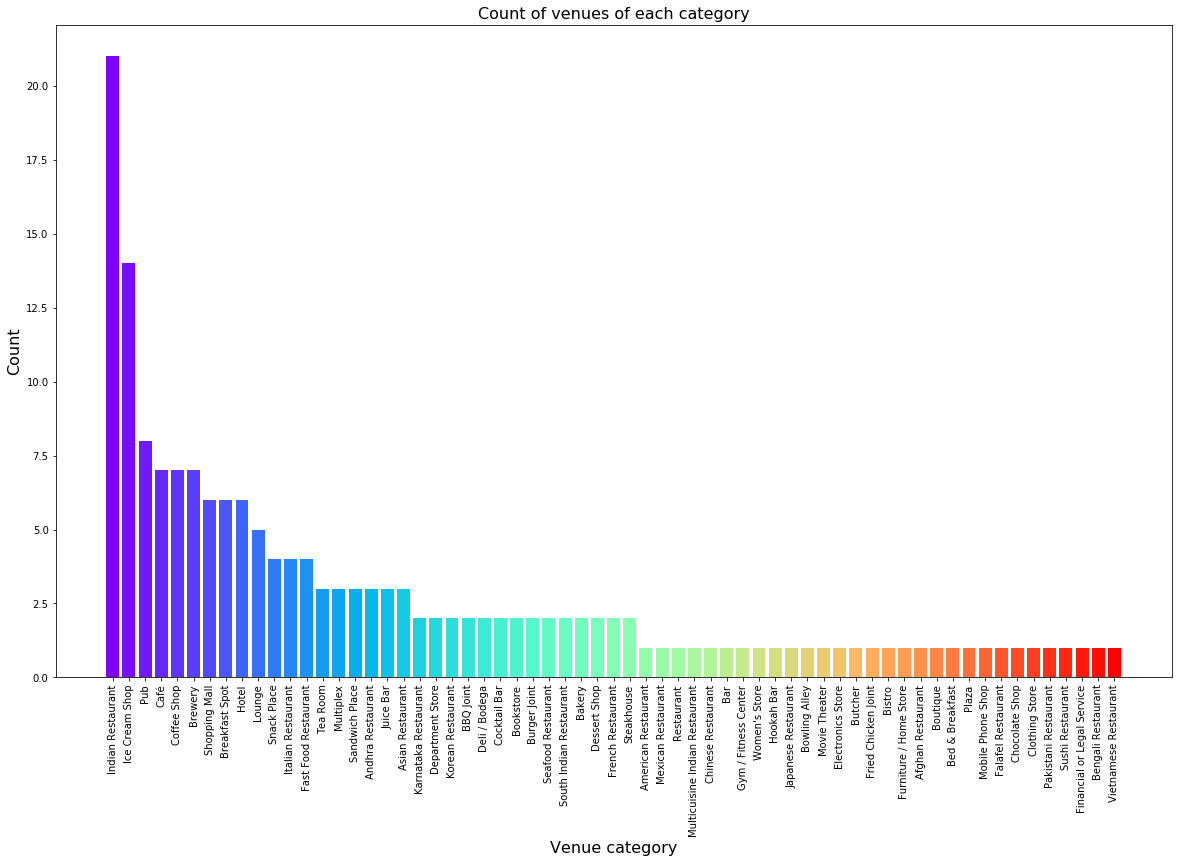

In [187]:
venue_distribution = selected_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

### Insights from Analysis
As we can see the majority venues are **Indian Restaurant** huge. Followed by **Ice Cream Shop**. Bangaloreans those who order food from zomato are mostly those IT Professionals. Bangaloreans also love deserts. So, if as a tourist, you're looking for Indian restaurants and Ice Cream Shops, you're in luck.

### Rating

Rating of a venue is an important factor on which a visitor decides whether it is worth it to visit the place. To cater to this, we will first see what is the average rating for all the venues in the city. Next, we will plot the venues on the map and color code them.

We'll first identify the various rating values and plot them as a bar plot with their counts to see the most common rating.

Text(0.5, 1.0, 'Count of venues with given rating')

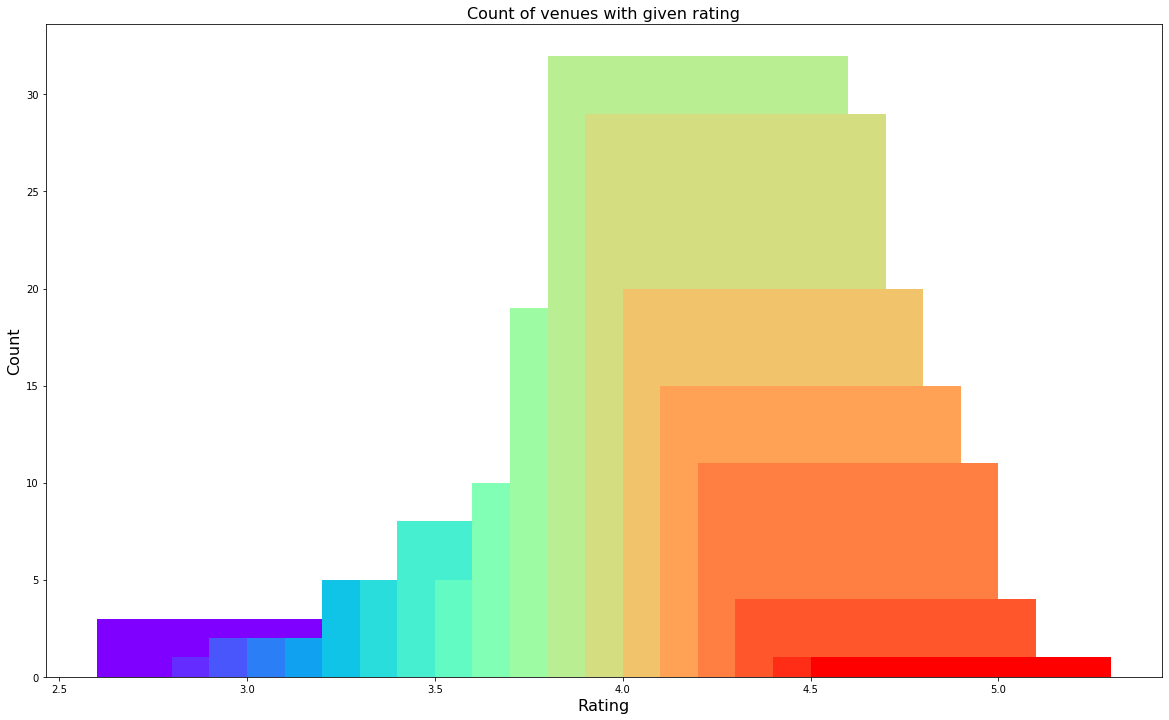

In [188]:
selected_venues['rating'] = selected_venues['rating'].astype(float)
rating = selected_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

From the plot above, it is clear that **majority venues** have their **rating close to 4**.

Let's create bins for various ratings and plot them in different colors on the map. The ratings will be divided between 4 bins:
* 1 to 2
* 2 to 3
* 3 to 4
* 4 to 5

In [189]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

Now, we will plot the venues on the map.

In [190]:
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen'}

chandigarh_map = folium.Map(location = [BLR_LAT, BLR_LON], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['venue'], 
                                                          selected_venues['address'], 
                                                          selected_venues['latitude'], 
                                                          selected_venues['longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(bangalore_map)  

bangalore_map.save("maps/venues-by-ratings.html")
bangalore_map

The map has the location of all the venues. It appears that many venues are located near about **CBD Area**, **MG Road** and **Richmond Road** with rating above 3. If someone wants to explore new venues, they should definitely check out Sector 35, Sector 17 or Elante Mall.

### Price

We will now take a look the venues based on the price values. We have two price features for our venues, one is `average_price` which defines the average cost for one person and the other is `price_range` which determines the price range as defined by Zomato.

We will first explore the `average_price` using a scatter plot between the price and the count of venues with that average price. We'll size the points based on the price to highlight their price.

Text(0.5, 1.0, 'Count of venues with given average price')

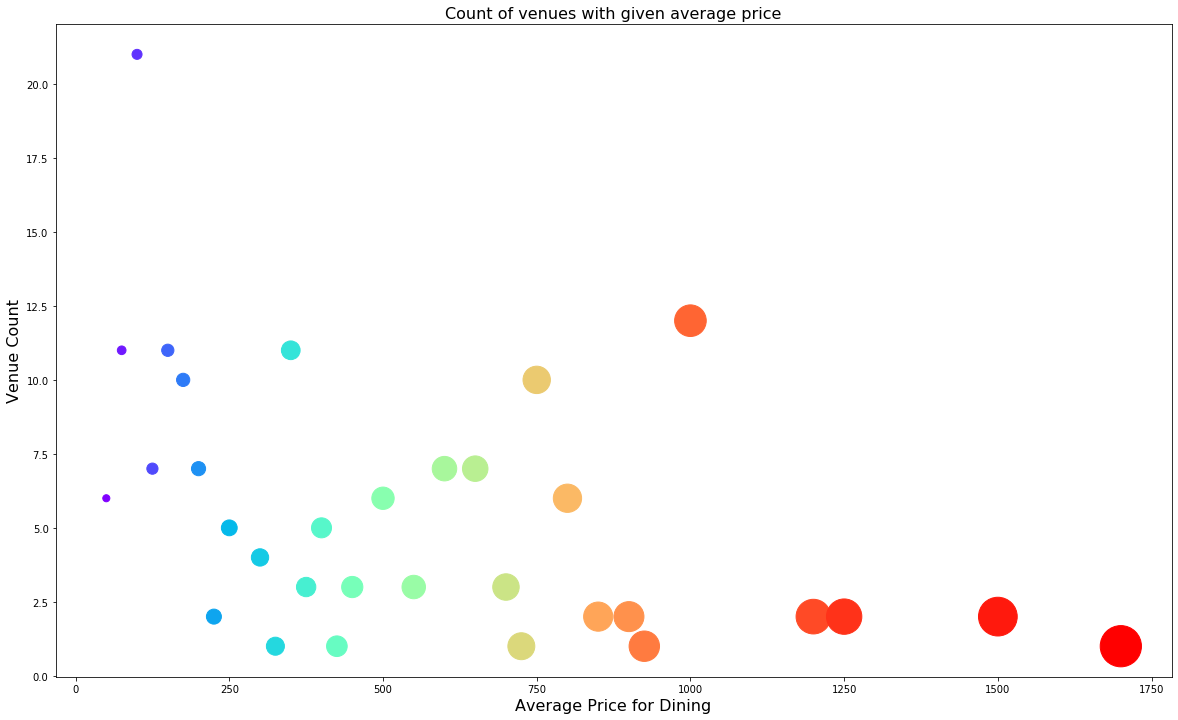

In [202]:
average_prices = selected_venues['average_price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.values))))
plt.xlabel("Average Price for Dining", fontsize = 16)
plt.ylabel("Venue Count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)


From the plot above we can see that a large number of venues have an average price between Rs 200 and Rs 800.

Users might also be interested in going to a place that fits in their budget. I'll use the `price_range` column to plot the venues on a map. We'll represent the venues with lower price in green and move towards red as the price increases.

In [203]:
color_map = {'1.0': 'green', '2.0': 'darkgreen', '3.0': 'orange', '4.0': 'red'}

bangalore_map = folium.Map(location = [BLR_LAT, BLR_LON], zoom_start = 13)

for name, address, latitude, longitude, price_range in zip(selected_venues['venue'], 
                                                           selected_venues['address'], 
                                                           selected_venues['latitude'], 
                                                           selected_venues['longitude'], 
                                                           selected_venues['price_range'].astype(str)):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[price_range]),
        popup = label).add_to(bangalore_map)  

bangalore_map.save("maps/venues-prices.html")
bangalore_map

### Some Observations and Insights

1. The venues near JP Nagar, Jay Nagar and Bansankhari are primarily lower priced.
2. The venues near Koramangala despite its high real easte price and posh area have moderately lower prices.
3. The Indira Nagar + HAL (Old Airport Road) has high prices. As this is the place where most of successful startup folks stay and this is most prominent and posh area of Bangalore.
4. The highest price ranges is in the central business district (CBD) which includes mainly MG Road, Lavelle Road, Richmond Circle, Ashok Nagar etc.
5. However one the CBD area has a mini cluster of affordable pricing fine dining, those are traditional food joints and pick and go near St. Marks Circle, which are quite popular cafes.

### Clustering

We will now cluster all these venues based on their price range, location and more to identify similar venues and the relationship amongst them. We'll cluster the venues into 6 separate groups.

#### Why 5 clusters ?

The reason being physical cluster not based on pricing. As evident from the map annotations, cluster center could be:
1. CBD Area (MG Road + Richmond Circle + Lavelle Road)
2. Kormangala 
3. Indira Nagar + Old Airport Road
4. Jaya Nagar + JP Nagar
5. Malleswaram

#### Also Elbow method we can verify the optimal number of clusters.

In [208]:
selected_venues.head()

,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,Hotel,Merak-JW Marriott Hotel,12.9724,77.5951,3.0,3.6,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",600.0,Good
1,Shopping Mall,Shiro,12.9718,77.5959,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",1500.0,Very good
2,Italian Restaurant,Toscano,12.9719,77.5964,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",1200.0,Very good
3,Ice Cream Shop,Corner House Ice Cream,12.9881,77.5772,1.0,4.5,"29/2, Nagappa Street, Nehrunagar Circle, Sesha...",175.0,Very good
4,Deli / Bodega,Smoke House Deli,12.9717,77.5983,3.0,4.6,"52/ 53, Ground Floor, Lavelle Road, Bangalore",800.0,Very good


In [216]:
NO_OF_CLUSTERS = 5

In [217]:
from sklearn.cluster import KMeans
clustering = selected_venues.drop(['categories', 'venue', 'address', 'rating_bin'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
selected_venues.head(5)

ValueError: cannot insert cluster_labels, already exists

In [221]:
bangalore_map = folium.Map(location = [BLR_LAT, BLR_LON], zoom_start = 13)
color_map = { 0:"purple", 1:"blue", 2:"green", 3:"orange" , 4:"red"}


In [223]:
# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(selected_venues['venue'], 
                                                        selected_venues['address'], 
                                                        selected_venues['cluster_labels'], 
                                                        selected_venues['latitude'], 
                                                        selected_venues['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(bangalore_map)

In [255]:
# add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(bangalore_map)

bangalore_map.save("maps/venues-clusters.html")
bangalore_map

SyntaxError: keyword argument repeated (<ipython-input-255-3bc4edc19fdf>, line 12)

From the map, we see the two clusters:
1. The first cluster is spread across the whole city and includes the majority venues.
2. The second cluster is very sparsely spread and has very limited venues.

# Analysis of Clusters 
I'll also check the venues of the two clusters.

## C1. Cluster with Label 0

In [257]:
result = selected_venues[selected_venues['cluster_labels'] == 0]
print("Cluster: C0")
result.head(10).reset_index(drop = True)

Cluster: C0


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,0,Hotel,Merak-JW Marriott Hotel,12.9724,77.5951,3.0,3.6,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",600.0,Good
1,0,Deli / Bodega,Smoke House Deli,12.9717,77.5983,3.0,4.6,"52/ 53, Ground Floor, Lavelle Road, Bangalore",800.0,Very good
2,0,French Restaurant,Cafe Noir,12.9721,77.5964,3.0,4.2,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",750.0,Very good
3,0,Tea Room,Infinitea Tea Room & Tea Store,12.9871,77.5948,3.0,4.3,"2, Shah Sultan Complex, Cunningham Road, Banga...",650.0,Very good
4,0,Brewery,The Biere Club,12.9712,77.5976,3.0,4.3,"20/2, Vittal Mallya Road, Lavelle Road, Bangalore",750.0,Very good
5,0,Pub,Plan B,12.9621,77.6015,3.0,4.2,"13, Rhenius Street, Opposite Hockey Stadium, S...",650.0,Very good
6,0,Afghan Restaurant,Samarkand,12.9806,77.6047,3.0,4.0,"Gem Plaza, Infantry Road, Bangalore",800.0,Good
7,0,Pub,Plan B,12.9679,77.6073,3.0,4.2,"20, Castle Street, Ashok Nagar, Brigade Road, ...",650.0,Very good
8,0,Pub,The Permit Room,12.9705,77.6103,3.0,4.5,"16/3, Ram Kunj, Commissariat Road, Brigade Roa...",750.0,Very good
9,0,Seafood Restaurant,Mahesh Lunch Home,12.9658,77.5981,3.0,4.2,"Cears Plaza, Opposite Bangalore Club, Residenc...",700.0,Very good


In [247]:
print("These venues for cluster#1 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['average_price'].mean(), result['rating'].astype(float).mean()))

These venues for cluster#1 have mean price range of 132.50 and rating spread around 4.10


## C2. Cluster with Label 1

In [248]:
result = selected_venues[selected_venues['cluster_labels'] == 1]
print("Cluster: C2")
result.head(10).reset_index(drop = True)

Cluster: C2


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Ice Cream Shop,Corner House Ice Cream,12.9881,77.5772,1.0,4.5,"29/2, Nagappa Street, Nehrunagar Circle, Sesha...",175.0,Very good
1,1,Ice Cream Shop,Corner House Ice Cream,12.9732,77.6000,1.0,4.4,"4, Madras Bank Road, Lavelle Road, Bangalore",175.0,Very good
2,1,Breakfast Spot,Brahmin's Coffee Bar,12.9540,77.5689,1.0,4.7,"Ranga Rao Road, Near Shankar Mutt, Shankarapur...",50.0,Very good
3,1,Plaza,Lakeview Milkbar,12.9760,77.6038,2.0,4.0,"89, Kannan Building, MG Road, Bangalore",250.0,Good
4,1,Breakfast Spot,Pizza Stop,12.9730,77.6001,1.0,3.6,"Airlines Hotel, 4, Madras Bank Road, Lavelle R...",200.0,Good
5,1,Ice Cream Shop,Natural Ice Cream,12.9714,77.6010,1.0,4.2,"20, Ground Floor, 15/16, House Of Lords, St. M...",100.0,Very good
6,1,Indian Restaurant,SGS Non Veg - Gundu Pulav,12.9703,77.5727,1.0,4.2,"21, Sowrastrapet, K V Temple Street, 2nd Cross...",200.0,Very good
7,1,Indian Restaurant,MTR 1924,12.9722,77.6009,1.0,4.2,"29, Ground Floor, White House, St. Marks Road,...",150.0,Very good
8,1,Indian Restaurant,Mavalli Tiffin Room (MTR),12.9552,77.5856,1.0,4.5,"14, Lalbagh Road, Mavalli, Basavanagudi, Banga...",125.0,Very good
9,1,Fried Chicken Joint,Kentacky Chicken Corner,12.9663,77.5952,1.0,4.1,"10, Sampangi Tank Road, Richmond Road, Bangalore",150.0,Very good


In [249]:
print("These venues for cluster#2 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['average_price'].mean(), result['rating'].astype(float).mean()))

These venues for cluster#2 have mean price range of 132.50 and rating spread around 4.10


## C3. Cluster with Label 2

In [251]:
result = selected_venues[selected_venues['cluster_labels'] == 2]
print("Cluster: C3")
result.head(10).reset_index(drop = True)

Cluster: C3


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,2,Shopping Mall,Shiro,12.9718,77.5959,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",1500.0,Very good
1,2,Japanese Restaurant,Shiro,12.9718,77.5959,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",1500.0,Very good
2,2,Hotel,b Café - Shangri-La Hotel,12.9921,77.5884,4.0,4.2,"Shangri-La Hotel, 56-6B, Palace Road, Vasanth ...",1700.0,Very good


In [258]:
print("These venues for cluster#3 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['average_price'].mean(), result['rating'].astype(float).mean()))

These venues for cluster#3 have mean price range of 710.42 and rating spread around 4.27


## C4. Cluster with Label 3

In [262]:
result = selected_venues[selected_venues['cluster_labels'] == 3]
print("Cluster: C3")
result.head(10).reset_index(drop = True)

Cluster: C3


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,3,Burger Joint,Truffles,12.9718,77.6011,2.0,4.4,"22, St. Marks Road, Bangalore",450.0,Very good
1,3,Bookstore,20 Feet High,12.9750,77.6050,3.0,4.0,"22, Amoeba Complex, Church Street, Bangalore",500.0,Good
2,3,Indian Restaurant,Ujwal Restaurant,12.9922,77.5945,2.0,3.9,"204/A, 4/2 Cross, Near Jain Hospital, Millers ...",350.0,Good
3,3,Steakhouse,Empire Restaurant,12.9917,77.5941,2.0,4.7,"47, Kohinoor Plaza, Opposite Mahaveer Jain Hos...",400.0,Very good
4,3,Pub,Smally's Resto Cafe,12.9755,77.6026,2.0,4.1,"46, Church Street, Bangalore",325.0,Very good
5,3,Café,Matteo Coffea,12.9745,77.6071,2.0,4.3,"2, Church Street, Bangalore",300.0,Very good
6,3,French Restaurant,Desserted,12.9931,77.5894,2.0,4.1,"42, 8th Main Road, Near Mount Carmel Managemen...",350.0,Very good
7,3,Restaurant,The Rogue Elephant,12.9415,77.5772,3.0,4.3,"93, Opposite Krishna Rao Park, Basavanagudi, B...",500.0,Very good
8,3,Andhra Restaurant,Nagarjuna,12.9732,77.6092,2.0,4.4,"44/1, Residency Road, Bangalore",400.0,Very good
9,3,Department Store,ROYCE' Chocolate,12.9735,77.6204,3.0,3.7,"Foodhall, 1 MG - Lido Mall, Trinity Circle, MG...",500.0,Good


In [264]:
print("These venues for cluster#4 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['average_price'].mean(), result['rating'].astype(float).mean()))

These venues for cluster#4 have mean price range of 403.38 and rating spread around 4.14


## C5. Cluster with Label 4

In [265]:
result = selected_venues[selected_venues['cluster_labels'] == 4]
print("Cluster: C5")
result.head(10).reset_index(drop = True)

Cluster: C5


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,4,Italian Restaurant,Toscano,12.9719,77.5964,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",1200.0,Very good
1,4,Lounge,Skyye,12.9716,77.5964,4.0,4.2,"Uber Level, 16th Floor, UB City, Vittal Mallya...",1250.0,Very good
2,4,Sushi Restaurant,Harima,12.9675,77.5999,4.0,4.3,"131, 4th Floor, Devatha Plaza, Residency Road,...",1000.0,Very good
3,4,American Restaurant,Hard Rock Cafe,12.9760,77.6016,4.0,4.5,"40, Opposite LIC Building, Off MG Road, St. Ma...",1250.0,Very good
4,4,Brewery,Arbor Brewing Company,12.9701,77.6108,4.0,4.4,"8, 3rd Floor, Allied Grande Plaza, Diagonally,...",1000.0,Very good
5,4,Lounge,ASEAN - On The Edge,12.9754,77.6050,3.0,4.3,"84, 13th Floor, Barton Center, MG Road, Bangalore",900.0,Very good
6,4,Coffee Shop,#BEiR,12.9745,77.6074,3.0,4.1,"Prestige RR 55/1 & 55/9, 2nd Floor, Church Str...",925.0,Very good
7,4,Cocktail Bar,Toast & Tonic,12.9667,77.6089,4.0,4.5,"14/1, Wood Street, Ashok Nagar, Richmond Road,...",1000.0,Very good
8,4,Clothing Store,Yauatcha,12.9735,77.6202,4.0,4.6,"Level 5, 1 MG Lido Mall, MG Road, Bangalore",1000.0,Very good
9,4,Bistro,Toscano,12.9370,77.5853,4.0,4.3,"359/38,Next to Fabindia, 7th Cross, 1st Block,...",1200.0,Very good


In [266]:
print("These venues for cluster#5 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['average_price'].mean(), result['rating'].astype(float).mean()))

These venues for cluster#5 have mean price range of 1032.89 and rating spread around 4.38


## Results and Discussion 
Based on our analysis above, we can draw a number of conclusions that will be useful to aid any visitor visiting the city of Chandigarh, India.

After collecting data from the Foursquare and Zomato APIs, we got a list of 120 different venues. However, not all venues from the two APIs were identical. Hence, we had to inspect their latitude and longitude values as well as names to combine them and remove all the outliers. This resulted in a total venue count of 49.

We identified that from the total set of venues, majority of them were Cafes and Indian Restaurants. A visitor who loves Cafes/Indian Restaurants would surely benefit from coming to Chandigarh.

While the complete range of ratings range from 1 to 5, the majority venues have ratings close to 4. This means that most restaurants provide good quality food which is liked by the people of the city, thus indicating the high rating. When we plot these venues on the map, we discover that there are clusters of venues around Sector 17, Sector 35 and Elante Mall. These clusters also have very high ratings (more than 3).

When we take a look at the price values of each venue, we explore that many venues have prices which are in the range of Rs 200 to Rs 400 for one person. However, the variation in prices is very large, given the complete range starts from Rs 100 and goes uptil Rs 1200. On plotting the venues based on their price range on the map, we discovered that venues located near Sector 17 and Sector 35 are relatively priced lower than venues in Sector 7 and Sector 26. A mix of low price and high price exist in Elante Mall.

Finally, through clusters we identified that there are many venues which are relatively lower priced but have an average rating of 3.57. On the other hand, there are few venues which are high priced and have average rating of 4.03.

If you're looking for cheap places with relatively high rating, you should check Sector 35.
If you're looking for the best places, with the highest rating but might also carry a high price tag, you should visit Sector 7 and Sector 26.
If you're looking to explore the city and have no specific criteria to decide upon the places you want to visit, you should try Elante Mall.
A company can use this information to build up an online website/mobile application, to provide users with up to date information about various venues in the city based on the search criteria (name, rating and price).

## Conclusion <a name="conclusion"></a>

The purpose of this project was to explore the places that a person visiting Chandigarh could visit. The venues have been identified using Foursquare and Zomato API and have been plotted on the map. The map reveals that there are three major areas a person can visit: Sector 35, Sector 7 & 26 and Elante Mall. Based on the visitor's venue rating and price requirements, he/she can choose amongst the three places.